<a href="https://colab.research.google.com/github/ridlofebrio/PCVK_GANJIL_2024/blob/main/PCVK_Modul9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


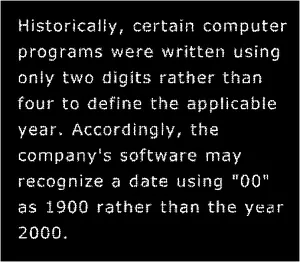

In [24]:
img = cv.imread('/content/drive/MyDrive/image/morphology.png',cv.IMREAD_GRAYSCALE)
cv2_imshow(img)

# No 3

<ipython-input-25-f8dc525ec02e>:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Gambar Asli')


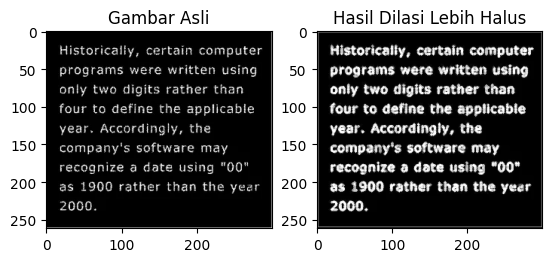

In [25]:
p, q = img.shape

# Tampilkan gambar asli
plt.imshow(img, cmap="gray")

# Buat array kosong untuk hasil dilasi
imgDilate = np.zeros((p, q), dtype=np.uint8)

# Definisikan Structuring Element Cross 3x3
SED = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]])
constant1 = 1  # Padding lebih kecil untuk dilasi lebih halus

# Operasi dilasi manual tanpa fungsi bawaan OpenCV
for i in range(constant1, p - constant1):
    for j in range(constant1, q - constant1):
        # Ambil area piksel yang seukuran Structuring Element
        temp = img[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]

        # Kalikan area tersebut dengan Structuring Element
        product = temp * SED

        # Set nilai piksel hasil dilasi dengan nilai maksimum dari area
        imgDilate[i, j] = np.max(product)

# Menampilkan gambar asli dan hasil dilasi
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Gambar Asli')
plt.subplot(122), plt.imshow(imgDilate, cmap="gray"), plt.title('Hasil Dilasi Lebih Halus')
plt.show()


# no 4

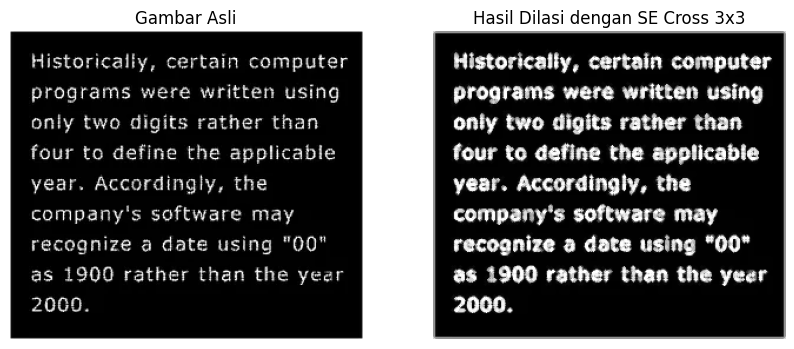

In [27]:
# Mendefinisikan Structuring Element berbentuk cross 3x3
# SE cross 3x3 memiliki nilai 1 di tengah, atas, bawah, kiri, dan kanan
SED = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan operasi dilasi dengan OpenCV menggunakan SED yang didefinisikan
img_dilated = cv2.dilate(img, SED)

# Menampilkan citra asli dan hasil dilasi menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_dilated, cmap='gray')
plt.title('Hasil Dilasi dengan SE Cross 3x3')
plt.axis('off')

plt.show()

# no 5

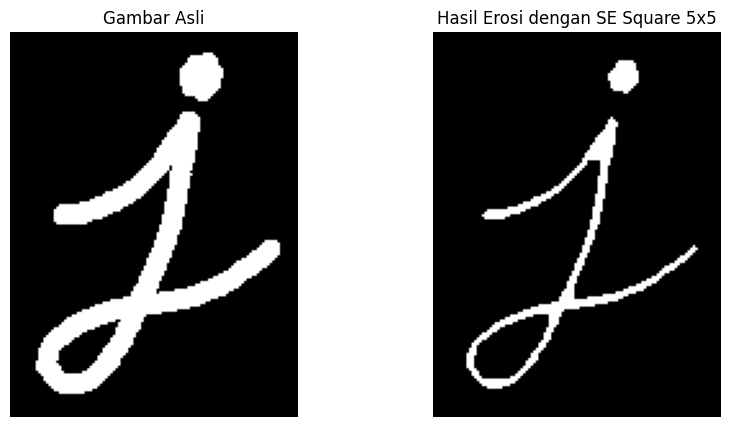

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Membaca gambar input dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/image/j.png', cv2.IMREAD_GRAYSCALE)

# Ukuran citra
m, n = img.shape

# Membuat array kosong untuk menyimpan hasil erosi
imgErode = np.zeros((m, n), dtype=np.uint8)

# Membuat Structuring Element (SE) berbentuk square 5x5
SE = np.ones((5, 5), dtype=np.uint8)  # Square 5x5 berisi semua nilai 1
constant = (5 - 1) // 2  # Padding untuk SE berukuran 5x5

# Implementasi operasi erosi manual tanpa library bawaan OpenCV
for i in range(constant, m - constant):
    for j in range(constant, n - constant):
        # Mengambil area gambar sesuai ukuran SE (5x5)
        temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]

        # Mengalikan area gambar dengan SE
        product = temp * SE

        # Set nilai piksel hasil erosi dengan nilai minimum dari area tersebut
        imgErode[i, j] = np.min(product)

# Menampilkan citra asli
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Gambar Asli')
plt.axis('off')

# Menampilkan hasil erosi
plt.subplot(1, 2, 2)
plt.imshow(imgErode, cmap="gray")
plt.title('Hasil Erosi dengan SE Square 5x5')
plt.axis('off')
plt.show()


# no 6

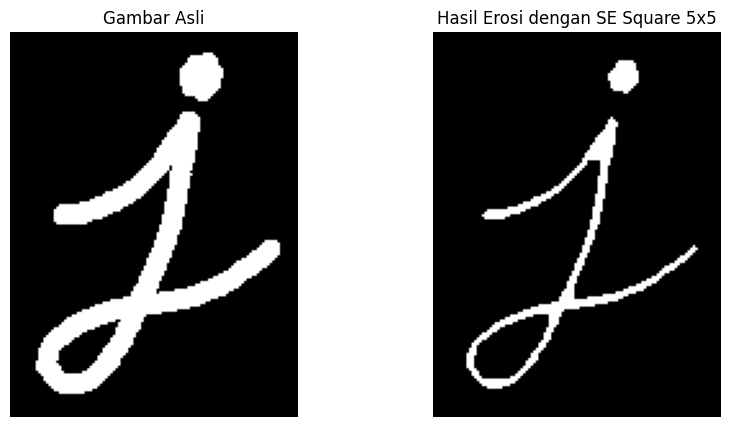

In [31]:
# Definisikan Structuring Element berbentuk square 5x5
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # Square 5x5

# Melakukan operasi erosi menggunakan fungsi cv2.erode
img_eroded = cv2.erode(img, SE)

# Menampilkan gambar asli dan hasil erosi
plt.figure(figsize=(10, 5))

# Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Hasil Erosi
plt.subplot(1, 2, 2)
plt.imshow(img_eroded, cmap='gray')
plt.title('Hasil Erosi dengan SE Square 5x5')
plt.axis('off')

# Tampilkan hasil
plt.show()

# no 7

In [33]:
img = cv2.imread('/content/drive/MyDrive/image/fingerprint.png', cv2.IMREAD_GRAYSCALE)

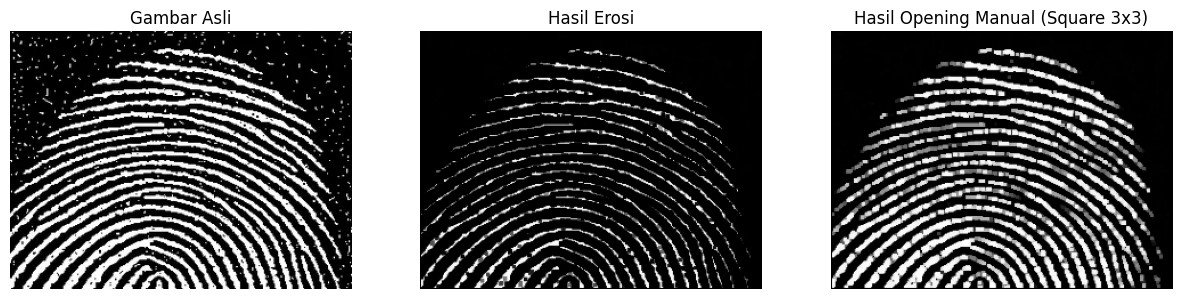

In [34]:


# Ukuran citra
m, n = img.shape

# Membuat array kosong untuk menyimpan hasil erosi dan dilasi
img_eroded = np.zeros((m, n), dtype=np.uint8)
img_opening = np.zeros((m, n), dtype=np.uint8)

# Membuat Structuring Element (SE) berbentuk square 3x3
SE = np.ones((3, 3), dtype=np.uint8)  # Square 3x3
constant = (3 - 1) // 2  # Padding untuk SE berukuran 3x3

# Operasi Erosi Manual
for i in range(constant, m - constant):
    for j in range(constant, n - constant):
        # Mengambil area gambar sesuai ukuran SE (3x3)
        temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * SE
        img_eroded[i, j] = np.min(product)

# Operasi Dilasi Manual pada hasil erosi
for i in range(constant, m - constant):
    for j in range(constant, n - constant):
        # Mengambil area gambar sesuai ukuran SE (3x3)
        temp = img_eroded[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * SE
        img_opening[i, j] = np.max(product)

# Menampilkan hasil erosi dan dilasi (opening)
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Hasil Erosi
plt.subplot(1, 3, 2)
plt.imshow(img_eroded, cmap='gray')
plt.title('Hasil Erosi')
plt.axis('off')

# Hasil Opening (Erosi -> Dilasi)
plt.subplot(1, 3, 3)
plt.imshow(img_opening, cmap='gray')
plt.title('Hasil Opening Manual (Square 3x3)')
plt.axis('off')

plt.show()


# no 8

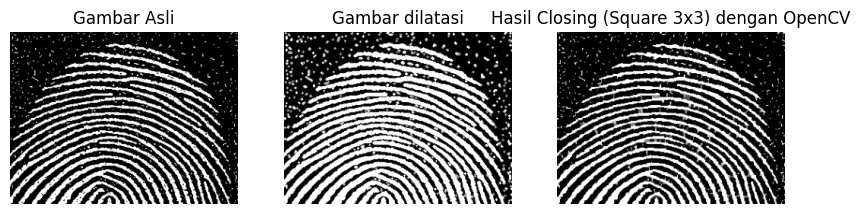

In [38]:

# Definisikan Structuring Element berbentuk square 3x3
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Square 3x3

SED = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan operasi dilasi dengan OpenCV menggunakan SED yang didefinisikan
img_dilated = cv2.dilate(img, SED)

# Operasi closing dengan menggunakan cv2.morphologyEx
img_closing_cv = cv2.morphologyEx(img, cv2.MORPH_CLOSE, SE)

# Menampilkan gambar asli dan hasil closing
plt.figure(figsize=(10, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_dilated, cmap='gray')
plt.title('Gambar dilatasi')
plt.axis('off')

# Hasil Closing Menggunakan OpenCV
plt.subplot(1, 3, 3)
plt.imshow(img_closing_cv, cmap='gray')
plt.title('Hasil Closing (Square 3x3) dengan OpenCV')
plt.axis('off')

plt.show()


# no 9

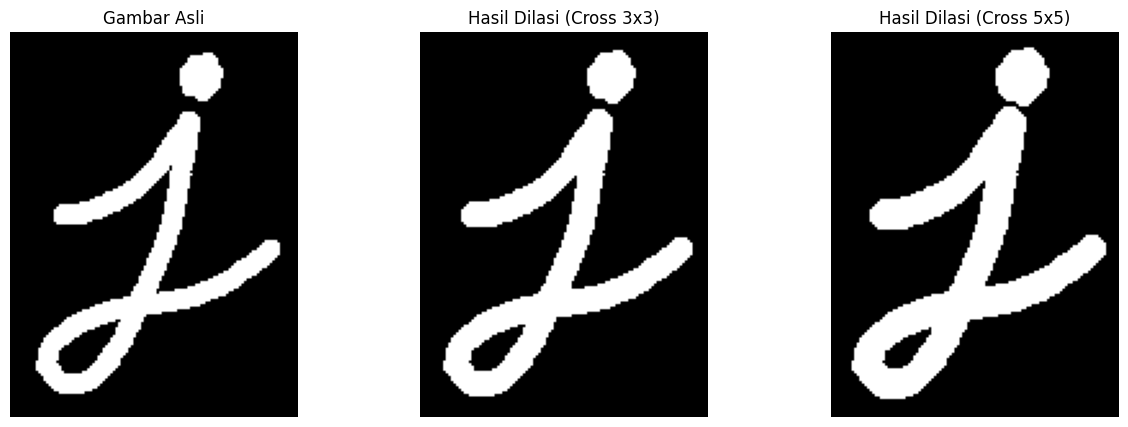

In [39]:
img = cv2.imread('/content/drive/MyDrive/image/j.png', cv2.IMREAD_GRAYSCALE)

# Definisikan Structuring Element berbentuk cross 3x3 dan 5x5
SE_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))  # Cross 3x3
SE_cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))  # Cross 5x5

# Melakukan operasi dilasi dengan OpenCV menggunakan SE berbentuk cross 3x3
img_dilated_3x3 = cv2.dilate(img, SE_cross_3x3)

# Melakukan operasi dilasi dengan OpenCV menggunakan SE berbentuk cross 5x5
img_dilated_5x5 = cv2.dilate(img, SE_cross_5x5)

# Menampilkan gambar asli dan hasil dilasi
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Hasil Dilasi dengan SE berbentuk Cross 3x3
plt.subplot(1, 3, 2)
plt.imshow(img_dilated_3x3, cmap='gray')
plt.title('Hasil Dilasi (Cross 3x3)')
plt.axis('off')

# Hasil Dilasi dengan SE berbentuk Cross 5x5
plt.subplot(1, 3, 3)
plt.imshow(img_dilated_5x5, cmap='gray')
plt.title('Hasil Dilasi (Cross 5x5)')
plt.axis('off')

# Tampilkan seluruh gambar
plt.show()


# no 10

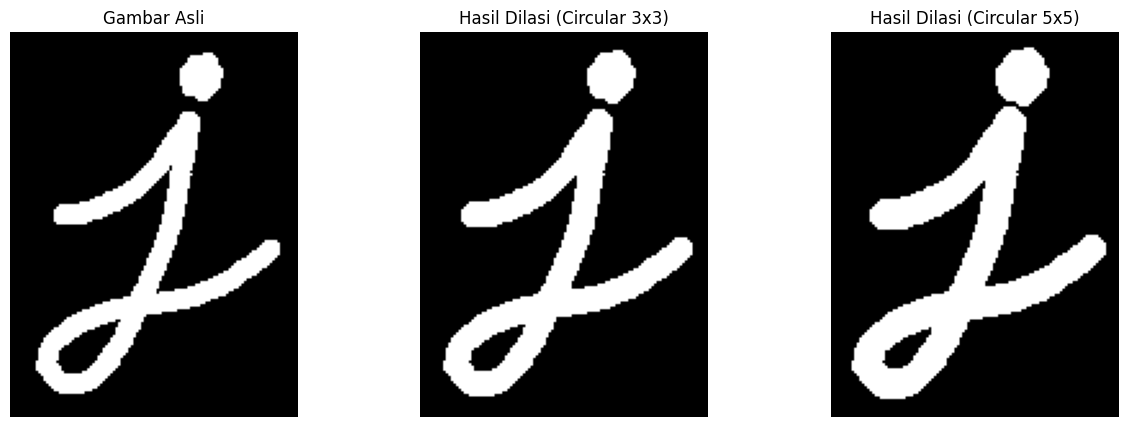

In [40]:

# Membuat Structuring Element berbentuk lingkaran 3x3
SE_circular_3x3 = np.zeros((3, 3), dtype=np.uint8)
cv2.circle(SE_circular_3x3, (1, 1), 1, 1, -1)  # Gambar lingkaran di dalam matriks 3x3

# Membuat Structuring Element berbentuk lingkaran 5x5
SE_circular_5x5 = np.zeros((5, 5), dtype=np.uint8)
cv2.circle(SE_circular_5x5, (2, 2), 2, 1, -1)  # Gambar lingkaran di dalam matriks 5x5

# Melakukan operasi dilasi dengan OpenCV menggunakan SE lingkaran 3x3
img_dilated_3x3 = cv2.dilate(img, SE_circular_3x3)

# Melakukan operasi dilasi dengan OpenCV menggunakan SE lingkaran 5x5
img_dilated_5x5 = cv2.dilate(img, SE_circular_5x5)

# Menampilkan gambar asli dan hasil dilasi
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Hasil Dilasi dengan SE berbentuk Circular 3x3
plt.subplot(1, 3, 2)
plt.imshow(img_dilated_3x3, cmap='gray')
plt.title('Hasil Dilasi (Circular 3x3)')
plt.axis('off')

# Hasil Dilasi dengan SE berbentuk Circular 5x5
plt.subplot(1, 3, 3)
plt.imshow(img_dilated_5x5, cmap='gray')
plt.title('Hasil Dilasi (Circular 5x5)')
plt.axis('off')

# Tampilkan seluruh gambar
plt.show()


# no 11

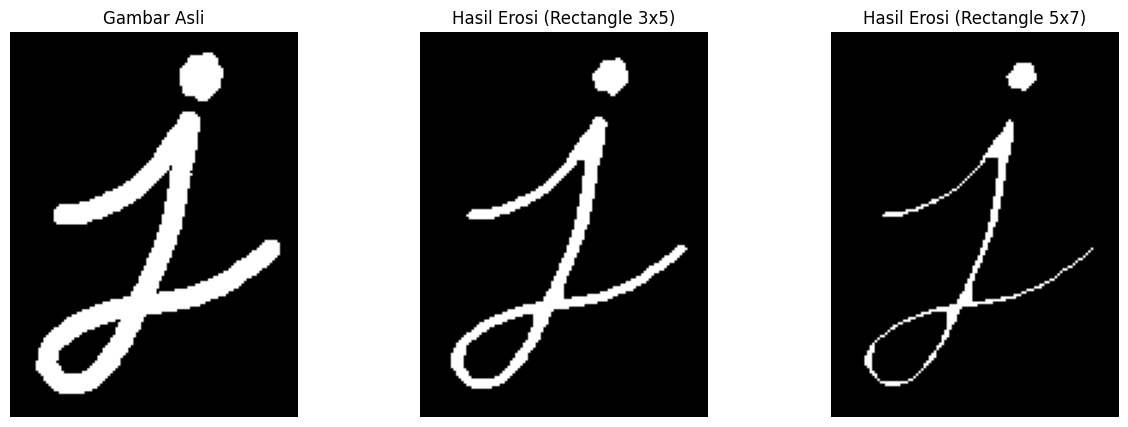

In [41]:
# Definisikan Structuring Element berbentuk rectangle 3x5 dan 5x7
SE_rectangle_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))  # Rectangle 3x5
SE_rectangle_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))  # Rectangle 5x7

# Melakukan operasi erosi dengan OpenCV menggunakan SE berbentuk rectangle 3x5
img_eroded_3x5 = cv2.erode(img, SE_rectangle_3x5)

# Melakukan operasi erosi dengan OpenCV menggunakan SE berbentuk rectangle 5x7
img_eroded_5x7 = cv2.erode(img, SE_rectangle_5x7)

# Menampilkan gambar asli dan hasil erosi
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Hasil Erosi dengan SE berbentuk Rectangle 3x5
plt.subplot(1, 3, 2)
plt.imshow(img_eroded_3x5, cmap='gray')
plt.title('Hasil Erosi (Rectangle 3x5)')
plt.axis('off')

# Hasil Erosi dengan SE berbentuk Rectangle 5x7
plt.subplot(1, 3, 3)
plt.imshow(img_eroded_5x7, cmap='gray')
plt.title('Hasil Erosi (Rectangle 5x7)')
plt.axis('off')

# Tampilkan seluruh gambar
plt.show()

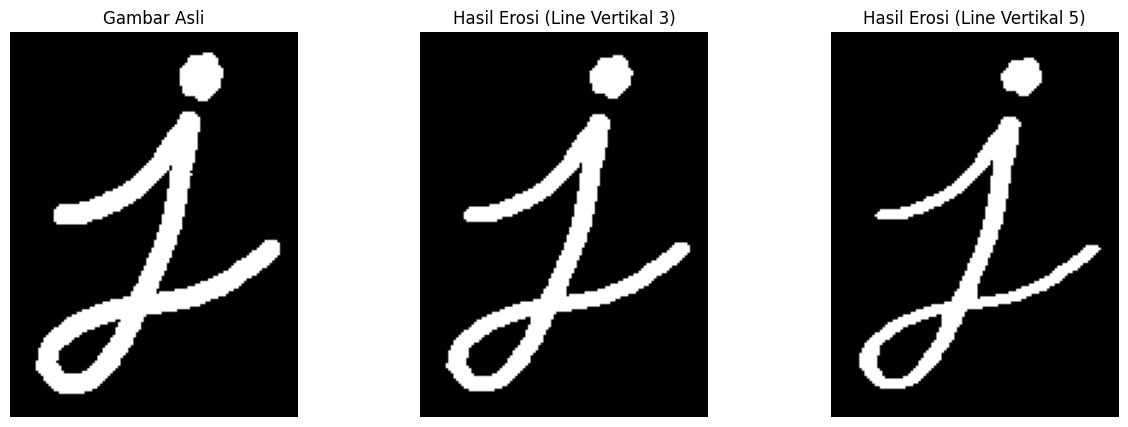

In [42]:
# Membuat Structuring Element berbentuk line vertikal dengan panjang 3
SE_line_vert_3 = np.zeros((3, 1), dtype=np.uint8)
SE_line_vert_3[:, 0] = 1  # Membuat elemen vertikal (kolom) dengan panjang 3

# Membuat Structuring Element berbentuk line vertikal dengan panjang 5
SE_line_vert_5 = np.zeros((5, 1), dtype=np.uint8)
SE_line_vert_5[:, 0] = 1  # Membuat elemen vertikal (kolom) dengan panjang 5

# Melakukan operasi erosi dengan OpenCV menggunakan SE berbentuk line vertikal 3
img_eroded_3 = cv2.erode(img, SE_line_vert_3)

# Melakukan operasi erosi dengan OpenCV menggunakan SE berbentuk line vertikal 5
img_eroded_5 = cv2.erode(img, SE_line_vert_5)

# Menampilkan gambar asli dan hasil erosi
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Hasil Erosi dengan SE berbentuk Line Vertikal 3
plt.subplot(1, 3, 2)
plt.imshow(img_eroded_3, cmap='gray')
plt.title('Hasil Erosi (Line Vertikal 3)')
plt.axis('off')

# Hasil Erosi dengan SE berbentuk Line Vertikal 5
plt.subplot(1, 3, 3)
plt.imshow(img_eroded_5, cmap='gray')
plt.title('Hasil Erosi (Line Vertikal 5)')
plt.axis('off')

# Tampilkan seluruh gambar
plt.show()